# Early stage Diabetes Risk Prediction
#### By Edison Musinde
## About Data.

*This dataset contains information on the signs and symptoms of newly diagnosed diabetic patients or those at risk of  developing diabetes. The data was collected through direct questionnaires administered to patients at the Sylhet Diabetes Hospital in Sylhet, Bangladesh, and approved by a doctor.

### Variables Table:

* age (Feature, Integer): Age of the patient
* gender (Feature, Categorical): Gender of the patient
* polyuria (Feature, Binary): Presence of polyuria (Yes/No)
* polydipsia (Feature, Binary): Presence of polydipsia (Yes/No)
* sudden_weight_loss (Feature, Binary): Experience of sudden weight loss (Yes/No)
* weakness (Feature, Binary): Experience of weakness (Yes/No)
* polyphagia (Feature, Binary): Presence of polyphagia (Yes/No)
* genital_thrush (Feature, Binary): Presence of genital thrush (Yes/No)
* visual_blurring (Feature, Binary): Experience of visual blurring (Yes/No)
* itching (Feature, Binary): Experience of itching (Yes/No)

### Description:

* Type: Multivariate
* Subject Area: Computer Science
* Associated Tasks: Classification
* Feature Type: Categorical, Integer
* Number of Instances: 520
* Number of Features: 16
* Missing Values: Yes

### Additional Variable Information:

* Age: Range from 20 to 65 years
* Gender: 1 for Male, 2 for Female
* Polyuria: 1 for Yes, 2 for No
* Polydipsia: 1 for Yes, 2 for No
* Sudden Weight Loss: 1 for Yes, 2 for No
* Weakness: 1 for Yes, 2 for No
* Polyphagia: 1 for Yes, 2 for No
* Genital Thrush: 1 for Yes, 2 for No
* Visual Blurring: 1 for Yes, 2 for No
* Itching: 1 for Yes, 2 for No
* Irritability: 1 for Yes, 2 for No
* Delayed Healing: 1 for Yes, 2 for No
* Partial Paresis: 1 for Yes, 2 for No
* Muscle Stiffness: 1 for Yes, 2 for No
* Alopecia: 1 for Yes, 2 for No
* Obesity: 1 for Yes, 2 for No
* Class: 1 for Positive, 2 for Negative




# Objectives
* Visualize the data to find out which features have the highest correlation with early stage diabetes. 
* Experiment with various classification techniques to identify which machine learning algorithm is best for early diabetes risk prediction

In [1]:
# Importing the neccessary modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder

In [2]:
#Load the file
df = pd.read_csv('/kaggle/input/early-stage-diabetes-risk-prediction/diabetes_data_upload.csv')

In [3]:
#Viewing the data
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [4]:
df.shape #Returns the size of the DataFrame

(520, 17)

In [5]:
df.isna().sum() # returns the sum of missing values per column

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

### Observation
1. There are no missing values in the dataset. 

# Data visualization

Text(0, 0.5, 'Count')

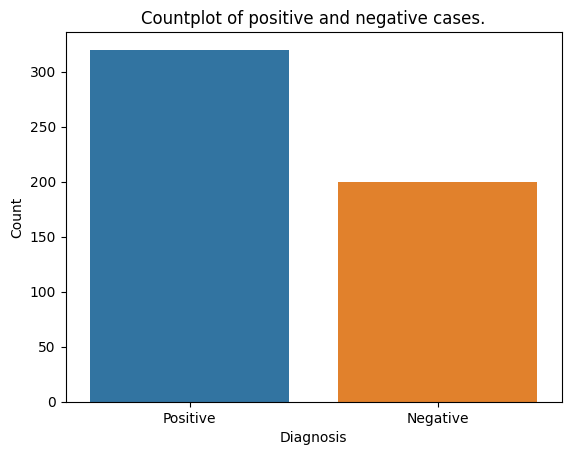

In [6]:
# Check the distribution of values in the target feature 'class'
sns.countplot(data=df, x='class')
plt.title('Countplot of positive and negative cases.')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

# Observation
1. There are more positive than negative cases in the data

Text(0.5, 1.0, 'Catplot of Gender VS Age with Diagnosis as hue')

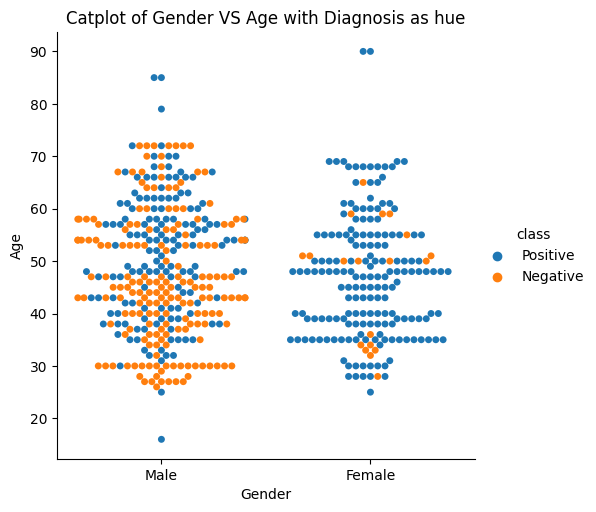

In [7]:
sns.catplot(df, x='Gender', y='Age', hue='class', kind='swarm')
plt.title('Catplot of Gender VS Age with Diagnosis as hue')

# Observations
1. Female patients constitute the highers positive diagnosis. 
2. All patients above the age of 75 tested positive

In [8]:
df.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [9]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [10]:
categorical_cols = ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity',]

In [11]:
import category_encoders as ce

In [12]:
# Use BinaryEncoder to encode categorical columns
binary_encoder = ce.BinaryEncoder(cols=categorical_cols)
df_encoded = binary_encoder.fit_transform(df)

# Check the encoded DataFrame
df_encoded

,Age,Gender_0,Gender_1,Polyuria_0,Polyuria_1,Polydipsia_0,Polydipsia_1,sudden weight loss_0,sudden weight loss_1,weakness_0,...,delayed healing_1,partial paresis_0,partial paresis_1,muscle stiffness_0,muscle stiffness_1,Alopecia_0,Alopecia_1,Obesity_0,Obesity_1,class
0,40,0,1,0,1,0,1,0,1,0,...,1,0,1,0,1,0,1,0,1,Positive
1,58,0,1,0,1,1,0,0,1,0,...,0,1,0,1,0,0,1,1,0,Positive
2,41,0,1,1,0,1,0,0,1,0,...,1,0,1,0,1,0,1,1,0,Positive
3,45,0,1,0,1,1,0,1,0,0,...,1,0,1,1,0,1,0,1,0,Positive
4,60,0,1,1,0,0,1,1,0,0,...,1,1,0,0,1,0,1,0,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,0,1,0,0,1,1,0,1,...,1,1,0,1,0,1,0,1,0,Positive
516,48,1,0,1,0,0,1,1,0,0,...,1,1,0,1,0,1,0,1,0,Positive
517,58,1,0,1,0,0,1,1,0,0,...,0,1,0,0,1,1,0,0,1,Positive
518,32,1,0,0,1,1,0,0,1,0,...,1,0,1,1,0,0,1,1,0,Negative


In [13]:
df_encoded['class'] = df_encoded['class'].map({'Positive': 1, 'Negative': 0})

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
column_to_scale = 'Age'
df_encoded[column_to_scale] = scaler.fit_transform(df_encoded[[column_to_scale]])
df_encoded

,Age,Gender_0,Gender_1,Polyuria_0,Polyuria_1,Polydipsia_0,Polydipsia_1,sudden weight loss_0,sudden weight loss_1,weakness_0,...,delayed healing_1,partial paresis_0,partial paresis_1,muscle stiffness_0,muscle stiffness_1,Alopecia_0,Alopecia_1,Obesity_0,Obesity_1,class
0,-0.661367,0,1,0,1,0,1,0,1,0,...,1,0,1,0,1,0,1,0,1,1
1,0.821362,0,1,0,1,1,0,0,1,0,...,0,1,0,1,0,0,1,1,0,1
2,-0.578993,0,1,1,0,1,0,0,1,0,...,1,0,1,0,1,0,1,1,0,1
3,-0.249498,0,1,0,1,1,0,1,0,0,...,1,0,1,1,0,1,0,1,0,1
4,0.986110,0,1,1,0,0,1,1,0,0,...,1,1,0,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,-0.743741,1,0,1,0,0,1,1,0,1,...,1,1,0,1,0,1,0,1,0,1
516,-0.002376,1,0,1,0,0,1,1,0,0,...,1,1,0,1,0,1,0,1,0,1
517,0.821362,1,0,1,0,0,1,1,0,0,...,0,1,0,0,1,1,0,0,1,1
518,-1.320358,1,0,0,1,1,0,0,1,0,...,1,0,1,1,0,0,1,1,0,0


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [16]:
X = df_encoded.drop(['class'], axis=1)
y = df_encoded['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [17]:
from sklearn.metrics import classification_report

# Model Comparison

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from category_encoders import BinaryEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)

In [20]:
predictions = {name: model.predict(X_test) for name, model in models.items()}

In [21]:
reports = {name: classification_report(y_test, pred) for name, pred in predictions.items()}
for name, report in reports.items():
    print(f"Classification Report for {name}:\n{report}\n")

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        33
           1       0.96      0.99      0.97        71

    accuracy                           0.96       104
   macr

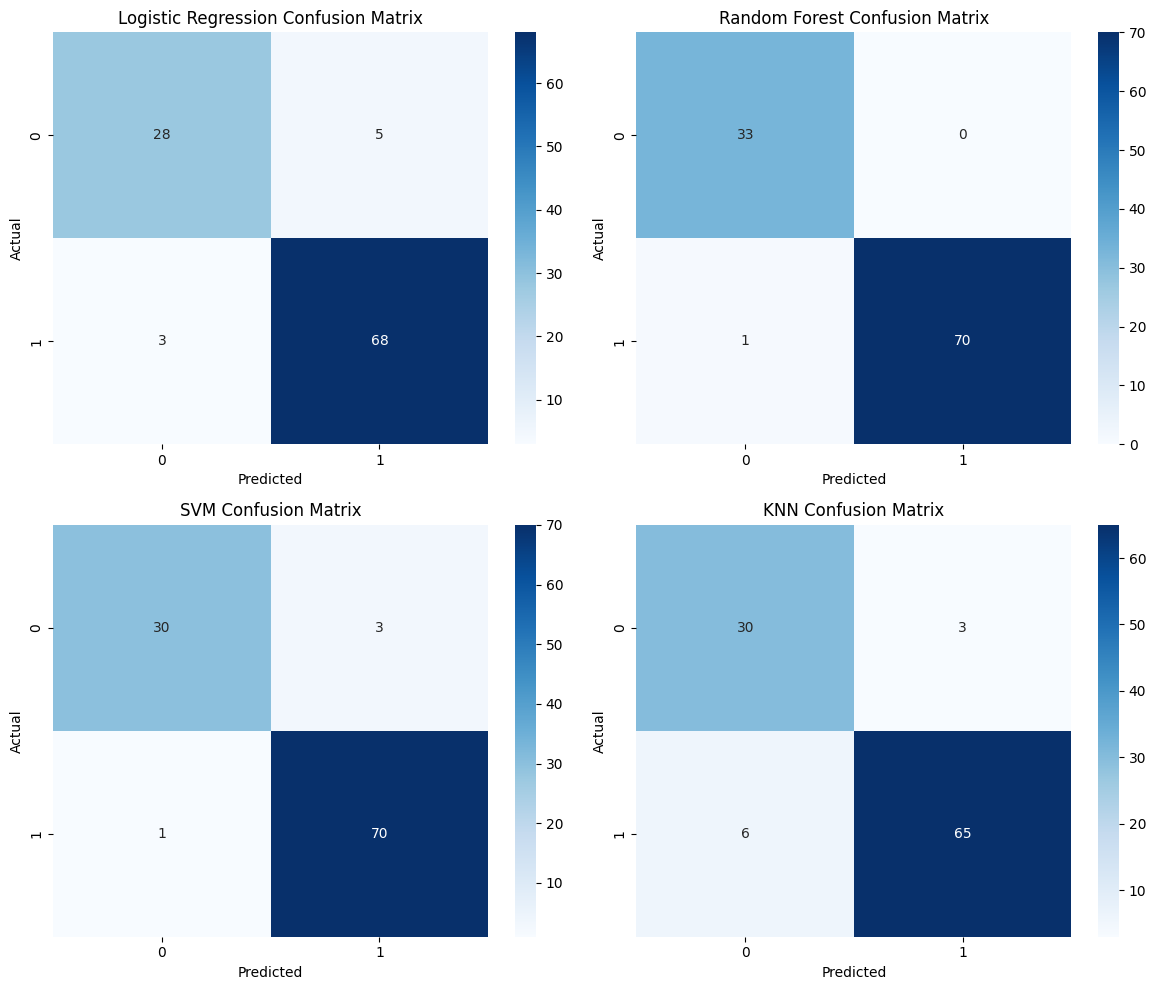

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, (name, pred) in zip(axes, predictions.items()):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f'{name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [23]:
from sklearn.metrics import classification_report
import pandas as pd

# Calculate classification reports
reports = {name: classification_report(y_test, pred, output_dict=True) for name, pred in predictions.items()}

# Extract weighted averages
weighted_averages = {
    name: {
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1-score': report['weighted avg']['f1-score']
    }
    for name, report in reports.items()
}

# Convert to DataFrame
df_weighted_averages = pd.DataFrame(weighted_averages).T
print(df_weighted_averages)


                     precision    recall  f1-score
Logistic Regression   0.922533  0.923077  0.922409
Random Forest         0.990667  0.990385  0.990422
SVM                   0.961708  0.961538  0.961205
KNN                   0.916997  0.913462  0.914409


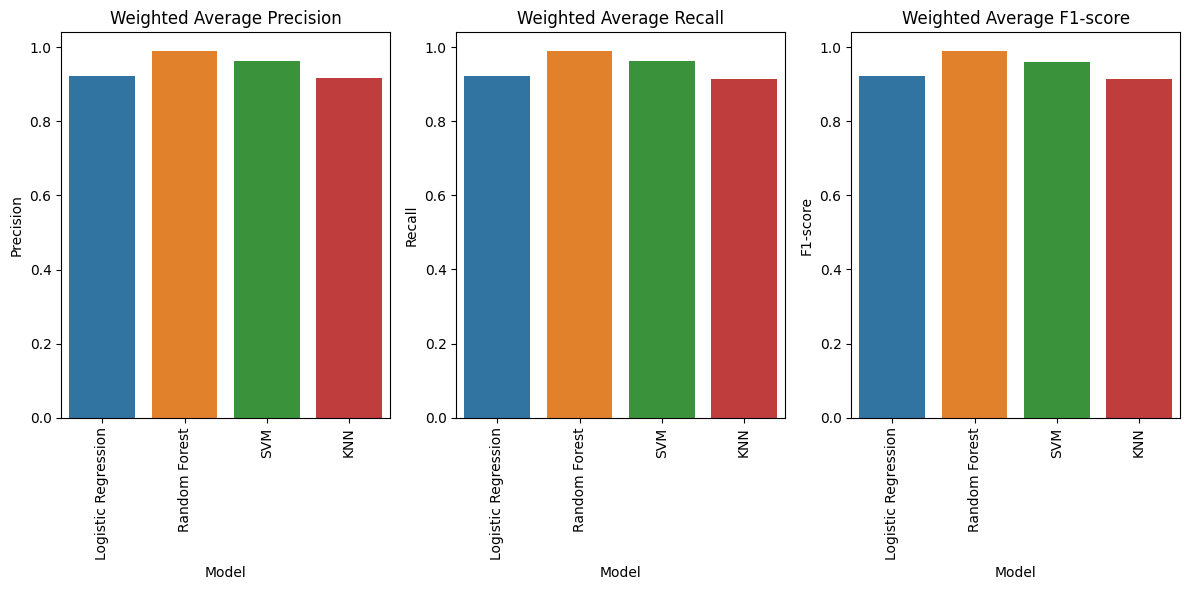

In [24]:
plt.figure(figsize=(12, 6))

metrics = ['precision', 'recall', 'f1-score']
for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.barplot(x=df_weighted_averages.index, y=df_weighted_averages[metric])
    plt.title(f'Weighted Average {metric.capitalize()}')
    plt.xlabel('Model')
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()